------------------------

# Indonesian Salary in ten Years ahead?!

------------------------

Dataset tentang UMP Indonesia dari 1997 - 2022 cukup menarik untuk dibahas. penelitian ini adalah prediksi dan analisis gaji di Indonesia menggunakan data UMP. Tujuan dari penelitian ini mungkin dapat beragam, seperti untuk memahami tren gaji di Indonesia, memprediksi gaji masa depan, atau untuk membantu kebijakan pemerintah dalam menentukan besaran UMP. Namun, ini hanya sebuah spekulasi dan tujuan penelitian yang tepat harus ditentukan berdasarkan konteks yang lebih lengkap dan terperinci.

------------------------

------------------------

## Import Module & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/indonesian-salary-by-region-19972022/Indonesian Salary by Region (1997-2022).csv


In [2]:
ump_data = pd.read_csv("/kaggle/input/indonesian-salary-by-region-19972022/Indonesian Salary by Region (1997-2022).csv")
ump_data.head()

,REGION,SALARY,YEAR
0,ACEH,128000,1997
1,SUMATERA UTARA,151000,1997
2,SUMATERA BARAT,119000,1997
3,RIAU,151500,1997
4,JAMBI,119500,1997


In [3]:
ump_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   REGION  870 non-null    object
 1   SALARY  870 non-null    int64 
 2   YEAR    870 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.5+ KB


------------------------

------------------------

## EDA Pre-Prediction

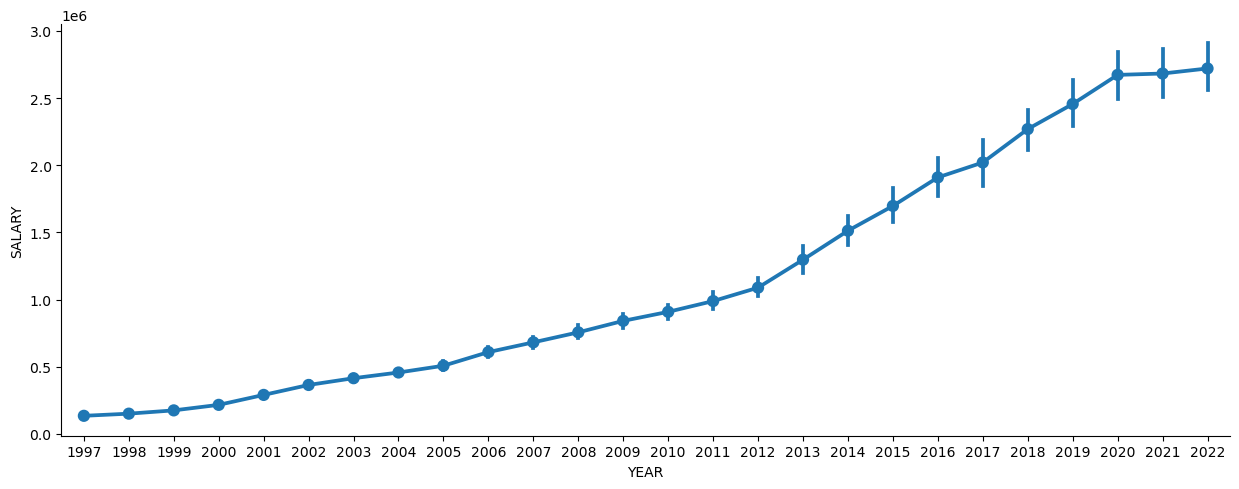

In [4]:
sns.catplot(x='YEAR', y='SALARY', data=ump_data, kind='point', aspect=2.5)


dari grafik diatas, grafik UMP dari tahun 1997 sampai dengan 2022 selalu berkembang. akan tetapi mulai di tahun 2014 sampai dengan 2022 angka pertumbuhannya seperti semakin Bervariasi (Variansi)

------------------------

### Growth Salary from 1997 - 2022

In [5]:
avg=ump_data.groupby(["YEAR"]).mean().reset_index()
avg.head()

,YEAR,SALARY
0,1997,134964.285714
1,1998,150937.500000
2,1999,175390.625000
3,2000,216506.250000
4,2001,290487.500000


In [6]:
growth=[0]
for i in range(1,26):
    growth.append(avg["SALARY"][i]-avg["SALARY"][i-1])

avg["growth"]=growth
avg.head()

,YEAR,SALARY,growth
0,1997,134964.285714,0.000000
1,1998,150937.500000,15973.214286
2,1999,175390.625000,24453.125000
3,2000,216506.250000,41115.625000
4,2001,290487.500000,73981.250000


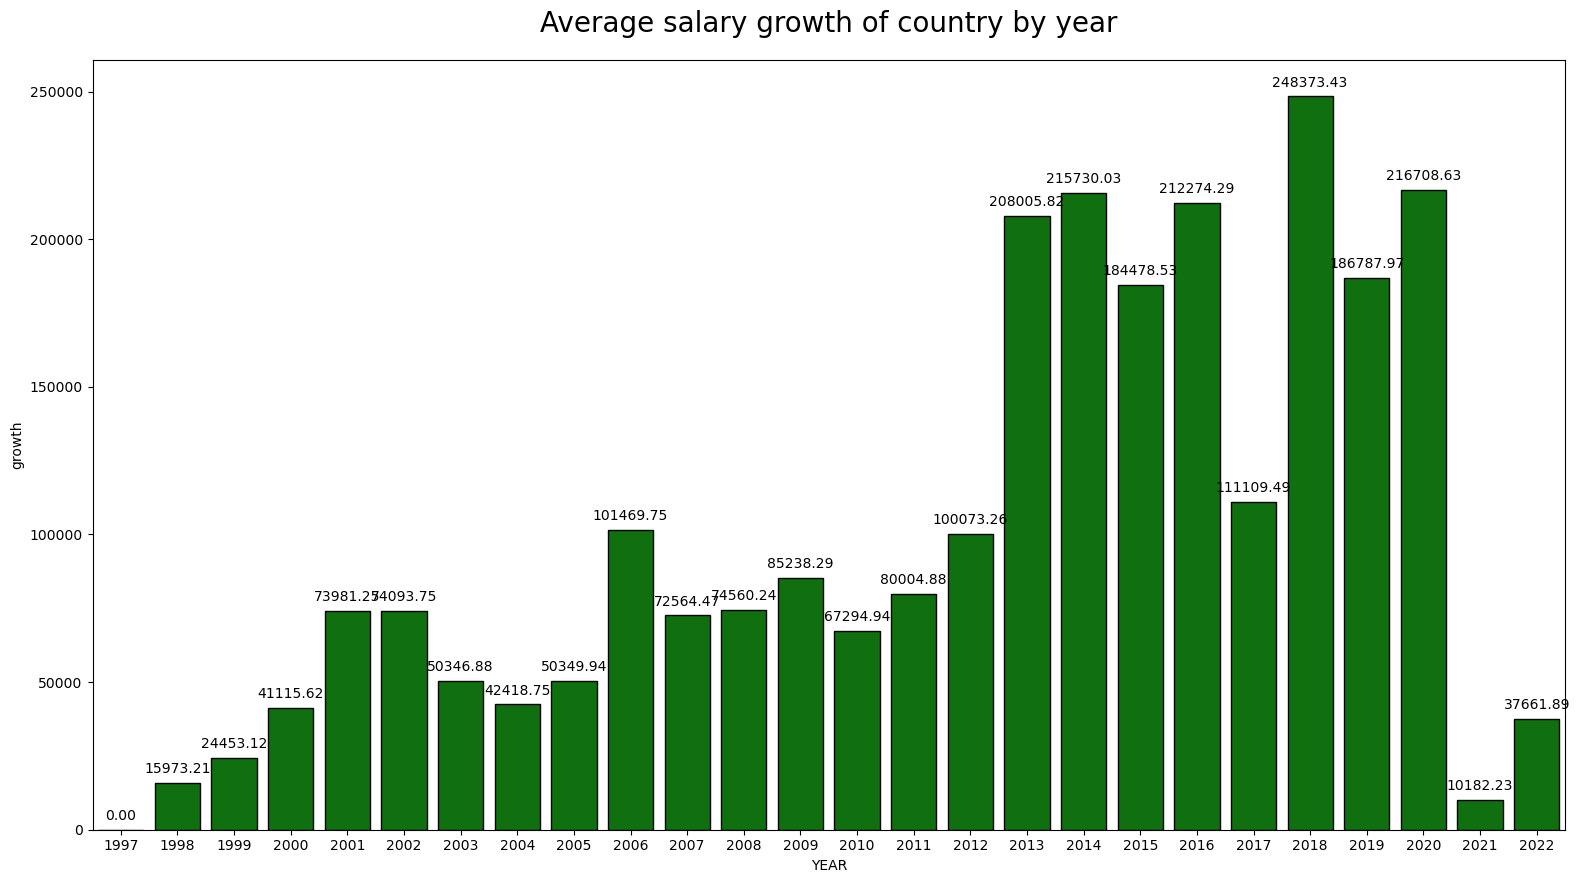

In [7]:
plt.figure(figsize=(19,10))
plt.title("Average salary growth of country by year", size=20, pad=20)

ax = sns.barplot(x='YEAR', y='growth', data=avg, color='green', edgecolor="black")

# loop through each bar and annotate
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
                
plt.show()

dari grafik diatas di ketahui, bahwa perkembangan di tahun 2018 merupakan tahun dengan rata-rata UMP tertinggi. disusul tahun 2020 dan 2014. dan yang terendah adalah di tahun 2021, disusul tahun 1998 dan 1999. nilai rendahnya ini mungkin di sebabkan pandemi covid di 2021, dan krisis moneter 1998-1999

------------------------

### 5 Province with Highest Salary

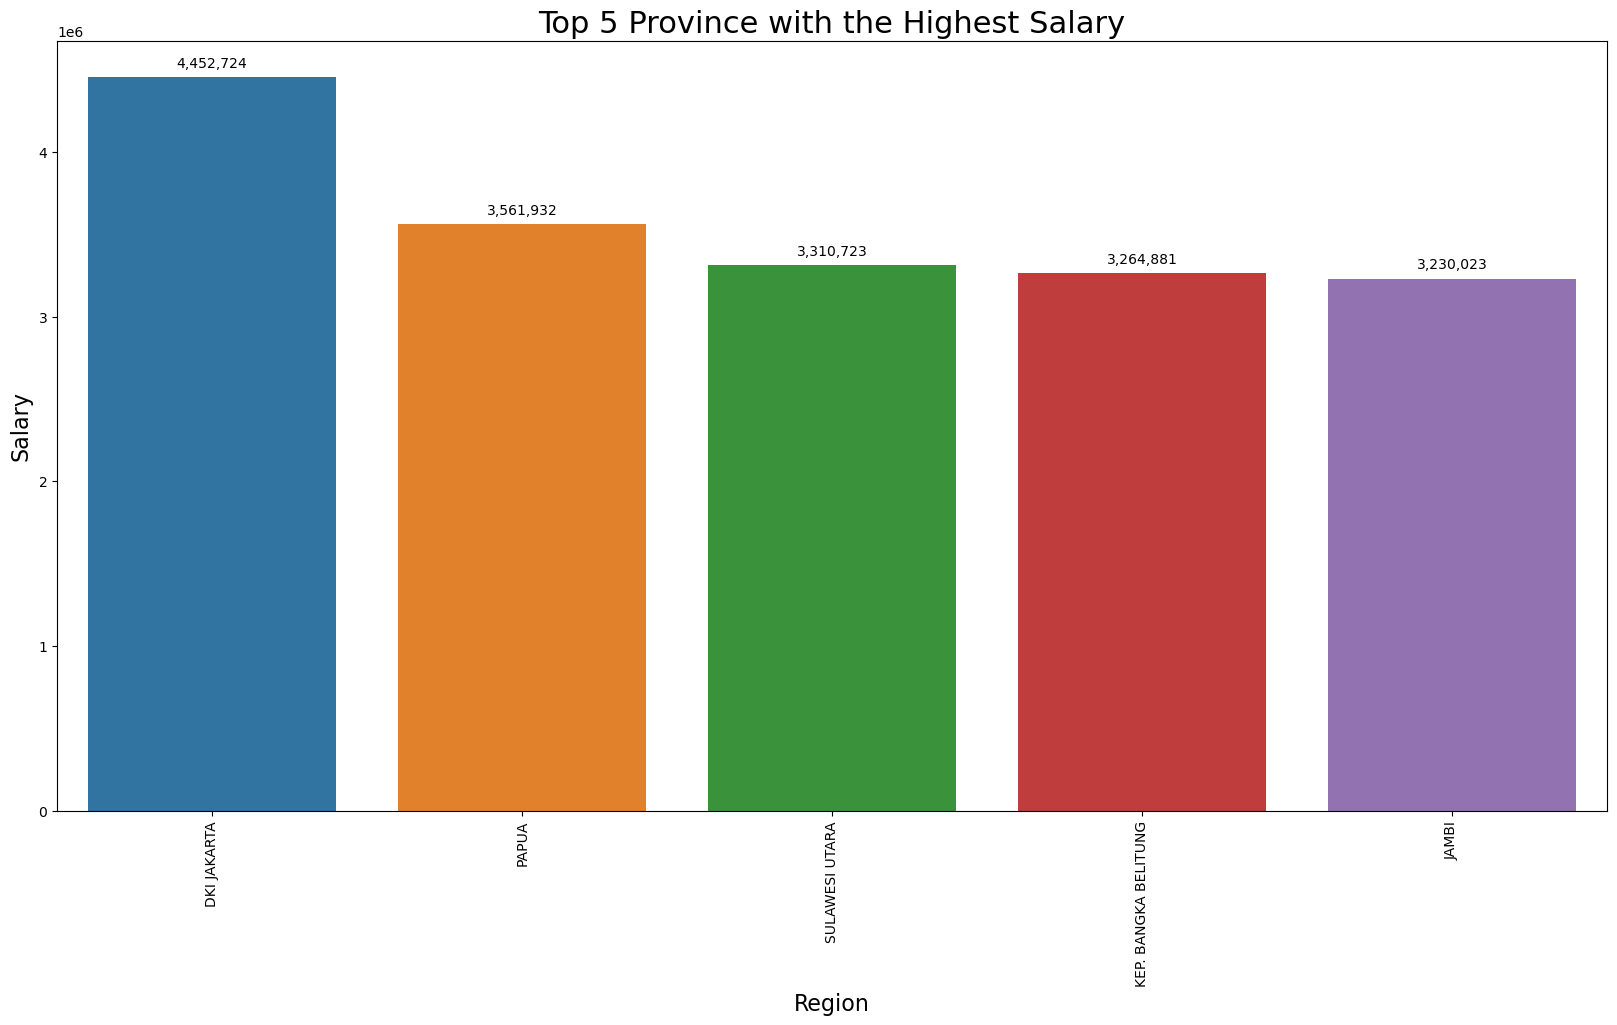

In [8]:
# ambil 5 region dengan salary tertinggi
top_5_regions = ump_data.groupby('REGION')['SALARY'].max().sort_values(ascending=False)[:5]
top_5_regions = top_5_regions.reset_index()

plt.figure(figsize = (20, 10))
graph = sns.barplot(x = 'REGION', y = 'SALARY', data=top_5_regions, order=top_5_regions['REGION'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Salary', fontsize=16)
plt.title('Top 5 Province with the Highest Salary', fontsize=22)

for index, row in top_5_regions.iterrows():
    graph.annotate(format(int(row['SALARY']), ','),
                   (row.name, row['SALARY']),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

diketahui, bahwa UMP tertinggi adalah 
1. DKI Jakarta ( Rp. 4.452.742 )
2. Papua (Rp.3.561.932)
3. Sulawesi Utara (Rp. 3.310.723)
4. Kep. Bangka Belitung (Rp. 3.264.881)
5. Jambi (Rp. 3.230.023)

------------------------

------------------------

# Modelling

karena penelitian ini bertujuan untuk memprediksi nilai UMP untuk 10 tahun kedepan (S/D 2032), maka dari itu peneliti melakukan data pre-processing untuk Kelompokkan data UMP berdasarkan provinsi dan urutkan berdasarkan tahun. dan melakukan permodelan *Linear Regression* untuk memprediksi nilai UMP di setiap Provinsi untuk 10 tahun kedepan

### Linear Regression Algorithm

In [9]:
ump_data = ump_data.reset_index(drop=True).groupby('REGION').apply(lambda x: x.sort_values('YEAR'))

models = {}
for provinsi in ump_data['REGION'].unique():
    X = ump_data.loc[ump_data['REGION'] == provinsi]['YEAR'].values.reshape(-1, 1)
    y = ump_data.loc[ump_data['REGION'] == provinsi]['SALARY'].values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    models[provinsi] = model

In [10]:
future_years = np.array(range(ump_data['YEAR'].max() + 1, ump_data['YEAR'].max() + 11))
future_ump = []
for provinsi in ump_data['REGION'].unique():
    model = models[provinsi]
    future_ump_provinsi = model.predict(future_years.reshape(-1, 1))
    future_ump.extend(future_ump_provinsi)

In [11]:
future_df = pd.DataFrame({
    'REGION': np.repeat(ump_data['REGION'].unique(), 10),
    'YEAR': np.tile(range(ump_data['YEAR'].max() + 1, ump_data['YEAR'].max() + 11), ump_data['REGION'].nunique()),
    'SALARY': future_ump
})

In [12]:
future_df['SALARY'] = future_df['SALARY'].astype(int)
future_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   REGION  350 non-null    object
 1   YEAR    350 non-null    int64 
 2   SALARY  350 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.3+ KB


In [13]:
future_df.head()

,REGION,YEAR,SALARY
0,ACEH,2023,3167366
1,ACEH,2024,3300026
2,ACEH,2025,3432686
3,ACEH,2026,3565346
4,ACEH,2027,3698006


Selanjutnya, Dataset 'Future_df' atau hasil prediksi di kombinasikan dengan dataframe awal agar perkembangan dari dataset dapat di eksplorasi lebih dalam

In [14]:
combined_df = pd.concat([ump_data, future_df],axis=0,ignore_index=True)

In [15]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   REGION  1220 non-null   object
 1   SALARY  1220 non-null   int64 
 2   YEAR    1220 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.7+ KB


In [16]:
combined_df.head()

,REGION,SALARY,YEAR
0,ACEH,128000,1997
1,ACEH,147000,1998
2,ACEH,171000,1999
3,ACEH,265000,2000
4,ACEH,300000,2001


'Combined_df' merupakan hasil kombinasi dataframe awal dan  hasil prediksi, selanjutnya peneliti akan melakukan tindak lanjut dari dataset kombinasi untuk di analisa kembali

**Ekspor data yang sudah di combinasi menjadi csv, untuk dokumentasi hasil prediksi**

In [17]:
#combined_df.to_csv('ump_data_combined.csv', index=False)

-------------------------------------------

-------------------------------------------

# EDA Post-Prediction

## Salary Growth from 2022-2032

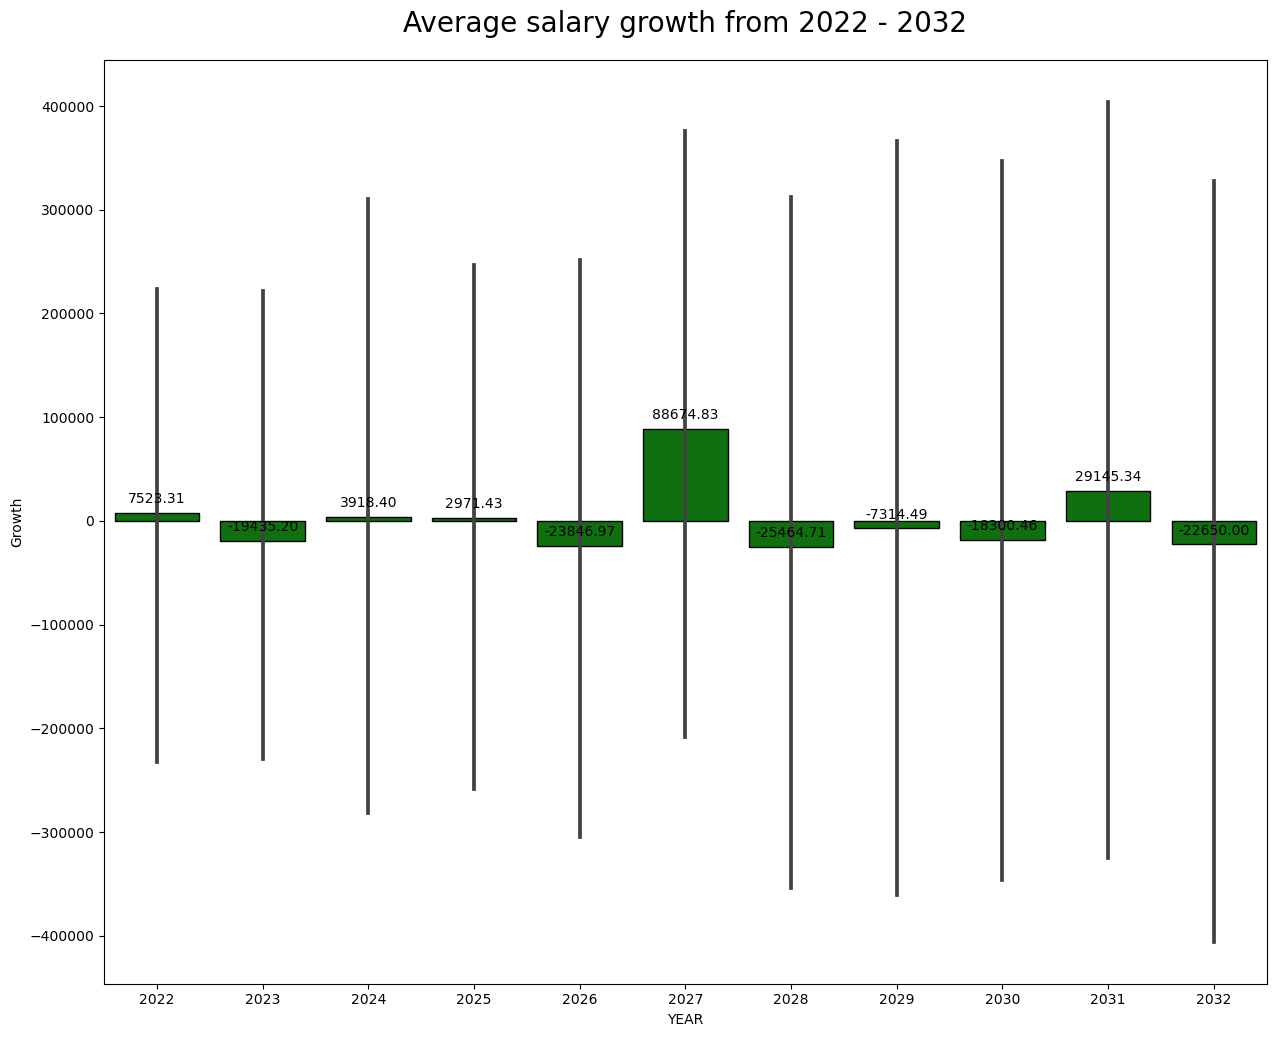

In [18]:
AVG = combined_df.sort_values(by='YEAR', ascending=True)

AVG['Growth'] = [0] + [AVG['SALARY'].iloc[i] - AVG['SALARY'].iloc[i-1] for i in range(1, len(AVG))]

plt.figure(figsize=(15,12))
plt.title("Average salary growth from 2022 - 2032", size=20, pad=20)

AVG_filtered = AVG.query('YEAR >= 2022 and YEAR <= 2032')

ax = sns.barplot(x='YEAR', y='Growth', data=AVG_filtered, color='green', edgecolor="black")

# loop through each bar and annotate
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
                
plt.show()


dilihat dari Grafik diatas perkembangan (*Growth*) rata-rata UMP Indonesia bisa dikatakan fluktuatif, di periode 2027 memiliki perkembangan yang sangat signifikan (Avg + Rp 88.674)

## Salary Growth from 1997-2032

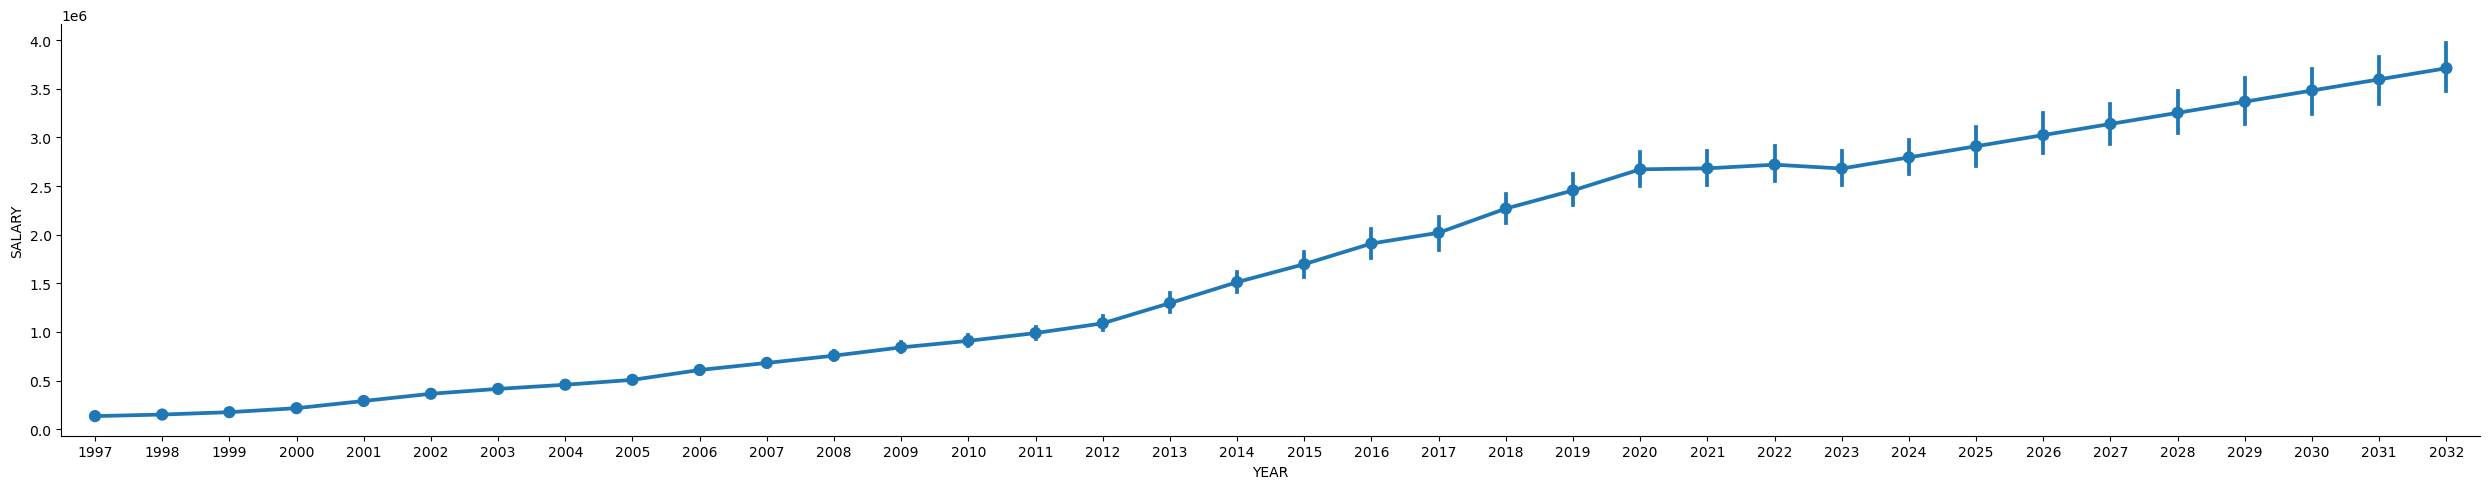

In [19]:
sns.catplot(x='YEAR', y='SALARY', data=combined_df, kind='point', aspect=5)

Perkembangan UMP dari tahun 2023 sampai dengan 2032 perkembangannya cukup signifikan, walaupun antara 2022 ke 2023 ada sedikit penurunan

In [20]:
import plotly.express as px

fig = px.bar(combined_df, x='REGION', y="SALARY",color="REGION",
  animation_frame="YEAR", range_y=[0,7000000])
fig.show()

Grafik di atas merupakan pergerakan dari perkembangan UMP dari setiap Provinsi di indonesia, grafik ini dimulai dari periode 1997 sampai dengan 2032 ( periode 35 tahun )

## 5 Province with highest Salary from 1997-2032

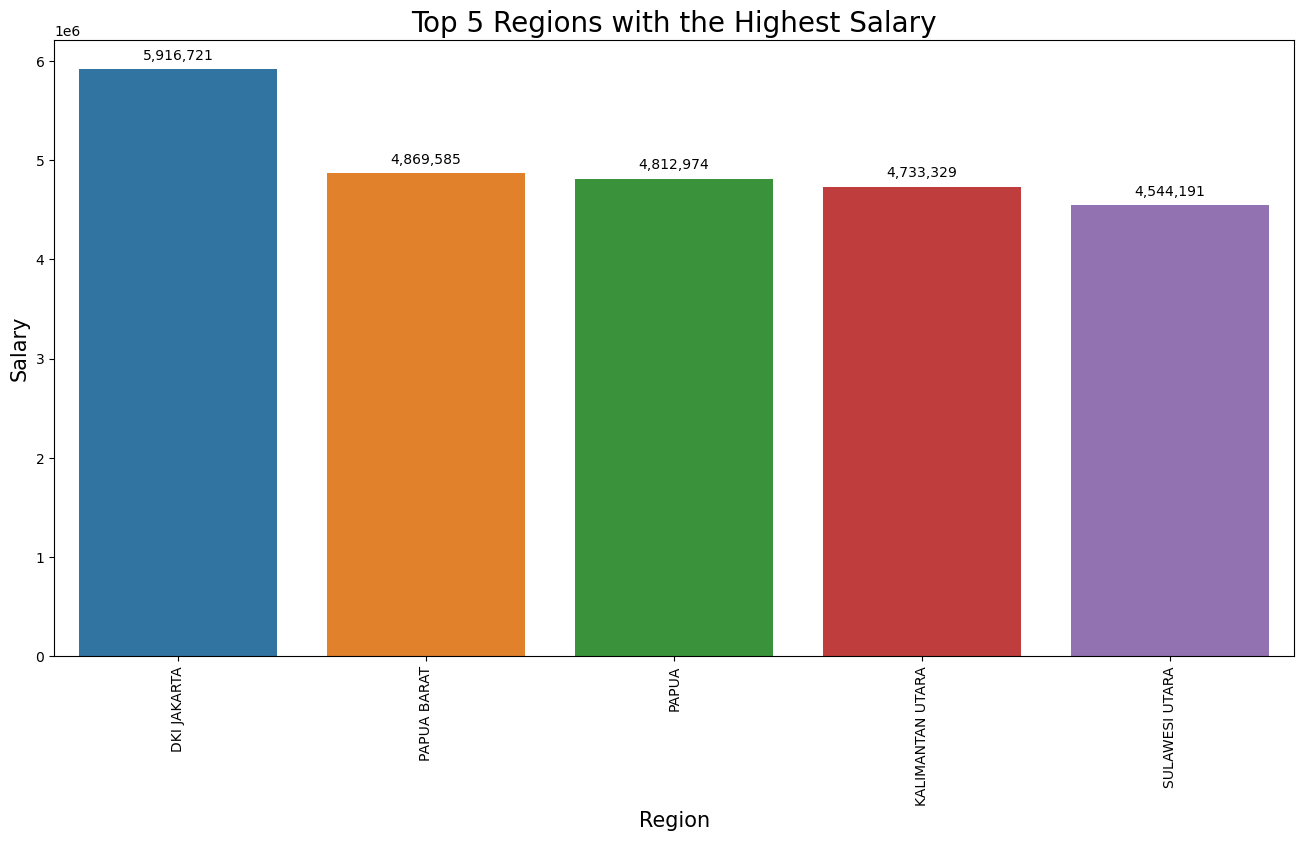

In [21]:
# ambil 5 region dengan salary tertinggi
top_5_regions = combined_df.groupby('REGION')['SALARY'].max().sort_values(ascending=False)[:5]
top_5_regions = top_5_regions.reset_index()



plt.figure(figsize = (16, 8))
graph = sns.barplot(x = 'REGION', y = 'SALARY', data=top_5_regions, order=top_5_regions['REGION'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.title('Top 5 Regions with the Highest Salary', fontsize=20)

for index, row in top_5_regions.iterrows():
    graph.annotate(format(int(row['SALARY']), ','),
                   (row.name, row['SALARY']),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

Prediksi menyatakan kalau DKI Jakarta tetap menjadi Provinsi dengan UMP tertinggi di Indonesia, besarnya mencapai Rp. 5.916.721, di susul oleh Papua Barat sebesar Rp 4.869.585, Papua Rp. 4.812.974, Kalimantan Utara Rp 4.733.329, dan Sulawesi Utara sebesar Rp. 4.544.191

# Summary

Hasil penelitian ini merupakan prediksi dari nilai UMP dari 26 Provinsi di Indonesia. di ketahui pun dari sebelum dilakukannya prediksi, UMP di Indonesia bisa dibilang terus berkembang dan terus naik dan itupun karena ada pengaruh makin tingginya tingkat perekonomian di Indonesia. Setelah Prediksi dilakukan dengan menggunakan model *Machine Learning Linear Regression*, dataset yang ada pun rentang waktunya jadi semakin panjang dari 1997-2032 (Periode 35 tahun), perkembangannya pun bisa dibilang cukup signifikan. dari prediksi ini pun dapat diketahui kalau Indonesia akan semakin maju dan makin berkembang tingkat perekonomiannya.

Hasil penilitian ini pun bukan semata-mata hasil yang mutlak, ini hanyalah permodelan *Machine Learning* yang tidak memberikan hasil absolut dan hanya sebuah prediksi sebagai gambaran kecil di masa depan nanti. Nilai UMP pun tidak bisa diprediksi dengan mudah dari apa yang ada di dataset ini, banyak faktor diluar dataset yang sangat kompleks untuk menentukan kenaikan Nilai UMP. di tambah ada lembaga Legislatif dan Eksekutif yang dapat mengatur Nilai UMP ini.

-------------------------------------------

-------------------------------------------